In [1]:
# Install required packages.
import os

#!pip install torch==1.7.0
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)


!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install git+https://github.com/rusty1s/pytorch_geometric.git

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 15.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/rusty1s/pytorch_geometric.git to /tmp/pip-req-build-_nmnvtac
  Running command git clone --filter=blob:none --quiet https://github.com/rusty1s/pytorch_geometric.git /tmp/pip-req-build-_nmnvtac
  Resolved https://github.com/rusty1s/pytorch_geometric.git to commit 7ac4654db727df73d1443c5102020abe859e5eb6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import argparse
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from math import sqrt
import math

from torch_geometric.datasets import TUDataset

import torch as th
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn.parameter import Parameter
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.nn import Linear, LayerNorm
from sklearn import metrics
from scipy.spatial.distance import hamming
import statistics
import pandas
from time import perf_counter
from IPython.core.display import deepcopy
from torch_geometric.nn import MessagePassing
import copy
from torch.nn import ReLU, Sequential
from torch import sigmoid
from itertools import chain
from time import perf_counter
from torch_geometric.data import Data, Batch, Dataset
from functools import partial
from torch_geometric.utils import to_networkx
from torch_geometric.utils import remove_self_loops
from typing import Callable, Union, Optional
#from torch_geometric.utils.num_nodes import maybe_num_nodes
import networkx as nx
from typing import List, Tuple, Dict
from collections import Counter
import statistics
from scipy import stats
import logging
import pandas as pd
import csv
import statistics


from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import torch_geometric.nn as gnn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = TUDataset(root='data/TUDataset', name='MUTAG')

Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


In [5]:
Explainability_name = 'PGMExplainer'
Task_name = 'Graph Classification'
Model_Name = "DIFFPOOL"
checkpoint_directory_Classifier = "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/model_classifier.pt"
classifier_lr = 0.001
classifier_dropout = 0.1
classifier_weight_decay = 1e-6
classifier_bias = True
DataSet_name = "MUTAG"

File_Name = Model_Name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " "

In [6]:
#train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=0, shuffle=True)
#print("Number of Training Graphs: ", len(train_dataset))
#print("Number of Test Graphs: ", len(test_dataset))

df = pandas.read_csv("/content/drive/My Drive/Explainability Methods/Train and Test Indexes on Graph Classification/Experimental Results/train_test_indexes.csv")

read_training_list_indexes__ = df['Train Indexes']
read_test_list_indexes__ = df['Test Indexes']
read_test_list_indexes__ = read_test_list_indexes__.dropna()
read_test_list_indexes = []
read_training_list_indexes = []
for element in read_test_list_indexes__:
    read_test_list_indexes.append(int(element))
for element in read_training_list_indexes__:
    read_training_list_indexes.append(int(element))


print(read_training_list_indexes)
print(read_test_list_indexes)

train_dataset = []
test_dataset = []
for index in read_training_list_indexes:
    train_dataset.append(dataset[index])
for index in read_test_list_indexes:
    test_dataset.append(dataset[index])


print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

[51, 142, 143, 10, 4, 141, 125, 23, 3, 79, 28, 117, 136, 156, 83, 128, 109, 70, 31, 58, 7, 148, 14, 187, 20, 162, 123, 13, 91, 185, 169, 102, 32, 55, 119, 25, 161, 175, 52, 121, 152, 108, 113, 65, 39, 103, 131, 42, 166, 110, 160, 68, 90, 89, 64, 172, 159, 72, 170, 18, 122, 29, 179, 49, 171, 178, 9, 74, 96, 48, 181, 127, 126, 87, 12, 163, 88, 53, 94, 146, 5, 158, 16, 67, 6, 59, 164, 151, 34, 47, 54, 46, 100, 112, 93, 182, 66, 106, 124, 19, 186, 133, 45, 15, 40, 167, 174, 98, 105, 153, 61, 63, 132, 116, 43, 80, 33, 147, 165, 69, 135, 86, 76, 57, 173, 115, 138, 140, 134, 180, 95, 22, 38, 41, 24, 120, 145, 26, 21, 50, 176, 107, 78, 17, 85, 154, 60, 92, 184, 129]
[0, 1, 2, 8, 11, 27, 30, 35, 36, 37, 44, 56, 62, 71, 73, 75, 77, 81, 82, 84, 97, 99, 101, 104, 111, 114, 118, 130, 137, 139, 144, 149, 150, 155, 157, 168, 177, 183]
Number of training graphs: 150
Number of test graphs: 38


In [7]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [8]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Models/Script/'
sys.path.insert(0,py_path)

import DIFFPOOL as diffpool_model
GNN_Model = diffpool_model.DIFFPOOL_Model(embedding_input_dim=7, embedding_num_block_layers=1, embedding_hid_dim=64,
                                          new_feature_size=64, assignment_input_dim=7, assignment_num_block_layers=1,
                                          assignment_hid_dim=64, max_number_of_nodes=256, prediction_hid_layers=[50],
                                          concat_neighborhood=False, num_classes=2, Weight_Initializer=1, Bias=classifier_bias,
                                          dropout_rate=0, normalize_graphsage=False, aggregation="mean", act_fun="ReLu",
                                          concat_diffpools_outputs=True, num_pooling=1, pooling="mean")

ReLu is Selected.


In [9]:
GNN_Model_Optimizer = torch.optim.Adam(GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)

In [10]:
criterion = torch.nn.CrossEntropyLoss()
def loss_calculations(preds, gtruth):
    loss_per_epoch = criterion(preds, gtruth)
    return loss_per_epoch

In [11]:
def visualize_losses(GNN_Model_losses, epoch_history):
    GNN_Model_losses_list = torch.stack(GNN_Model_losses).cpu().detach().numpy()

    fig = plt.figure(figsize=(27,20))

    ax = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(" Loss in Epoch: " + str(epoch_history))

    ax.plot(GNN_Model_losses_list, color='r')

    plt.savefig('/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/' + File_Name + 'Loss_til_epoch_{:04d}.png'.format(epoch_history))
    plt.show()


In [12]:
def train_step():
    GNN_Model_loss_batch = []
    Pred_Labels = []
    Real_Labels = []

    GNN_Model.train()
    GNN_Model.zero_grad()
    for batch_of_graphs in train_dataloader:

        concatination_list_of_poolings, softmaxed_h2 = GNN_Model(batch_of_graphs, None)
        batch_loss = loss_calculations(softmaxed_h2, batch_of_graphs.y)
        Pred_Labels.extend(softmaxed_h2.argmax(dim=1).detach().tolist())
        #print('passed')

        Real_Labels.extend(batch_of_graphs.y.detach().tolist())
        GNN_Model_loss_batch.append(batch_loss)

        batch_loss.backward()
        GNN_Model_Optimizer.step()

    return torch.mean(torch.tensor(GNN_Model_loss_batch)), metrics.accuracy_score(Real_Labels, Pred_Labels)

In [13]:
GNN_Model_training_Acc_per_epoch = []
GNN_Model_training_time_per_epoch = []
def train(EPOCHS, load_index):
    GNN_Model_training_loss_per_epoch = []

    for epoch in range(EPOCHS):
        t1 = perf_counter()
        GNN_Model_training_loss, training_acc = train_step()
        GNN_Model_training_time_per_epoch.append(perf_counter()-t1)
        print(f'Epoch: {epoch+1:03d}, Model Loss: {GNN_Model_training_loss:.4f}')

        GNN_Model_training_loss_per_epoch.append(GNN_Model_training_loss)
        GNN_Model_training_Acc_per_epoch.append(training_acc)
        #break

        if (epoch + load_index + 1) % 50 == 0 and epoch > 0:
            visualize_losses(GNN_Model_training_loss_per_epoch, epoch + load_index + 1)
        if (epoch + load_index + 1) % 100 == 0 and epoch > 0:
            torch.save({'epoch': epoch+load_index+1, 'model_state_dict': GNN_Model.state_dict(), 'optimizer_state_dict': GNN_Model_Optimizer.state_dict(), 'loss': GNN_Model_training_loss_per_epoch,}, "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(epoch + load_index + 1)+".pt")



Epoch: 001, Model Loss: 0.6833
Epoch: 002, Model Loss: 0.6731
Epoch: 003, Model Loss: 0.6625
Epoch: 004, Model Loss: 0.6511
Epoch: 005, Model Loss: 0.6395
Epoch: 006, Model Loss: 0.6287
Epoch: 007, Model Loss: 0.6203
Epoch: 008, Model Loss: 0.6159
Epoch: 009, Model Loss: 0.6153
Epoch: 010, Model Loss: 0.6159
Epoch: 011, Model Loss: 0.6156
Epoch: 012, Model Loss: 0.6143
Epoch: 013, Model Loss: 0.6128
Epoch: 014, Model Loss: 0.6119
Epoch: 015, Model Loss: 0.6114
Epoch: 016, Model Loss: 0.6107
Epoch: 017, Model Loss: 0.6093
Epoch: 018, Model Loss: 0.6076
Epoch: 019, Model Loss: 0.6059
Epoch: 020, Model Loss: 0.6040
Epoch: 021, Model Loss: 0.6016
Epoch: 022, Model Loss: 0.5987
Epoch: 023, Model Loss: 0.5950
Epoch: 024, Model Loss: 0.5899
Epoch: 025, Model Loss: 0.5838
Epoch: 026, Model Loss: 0.5764
Epoch: 027, Model Loss: 0.5672
Epoch: 028, Model Loss: 0.5549
Epoch: 029, Model Loss: 0.5420
Epoch: 030, Model Loss: 0.5288
Epoch: 031, Model Loss: 0.5203
Epoch: 032, Model Loss: 0.5100
Epoch: 0

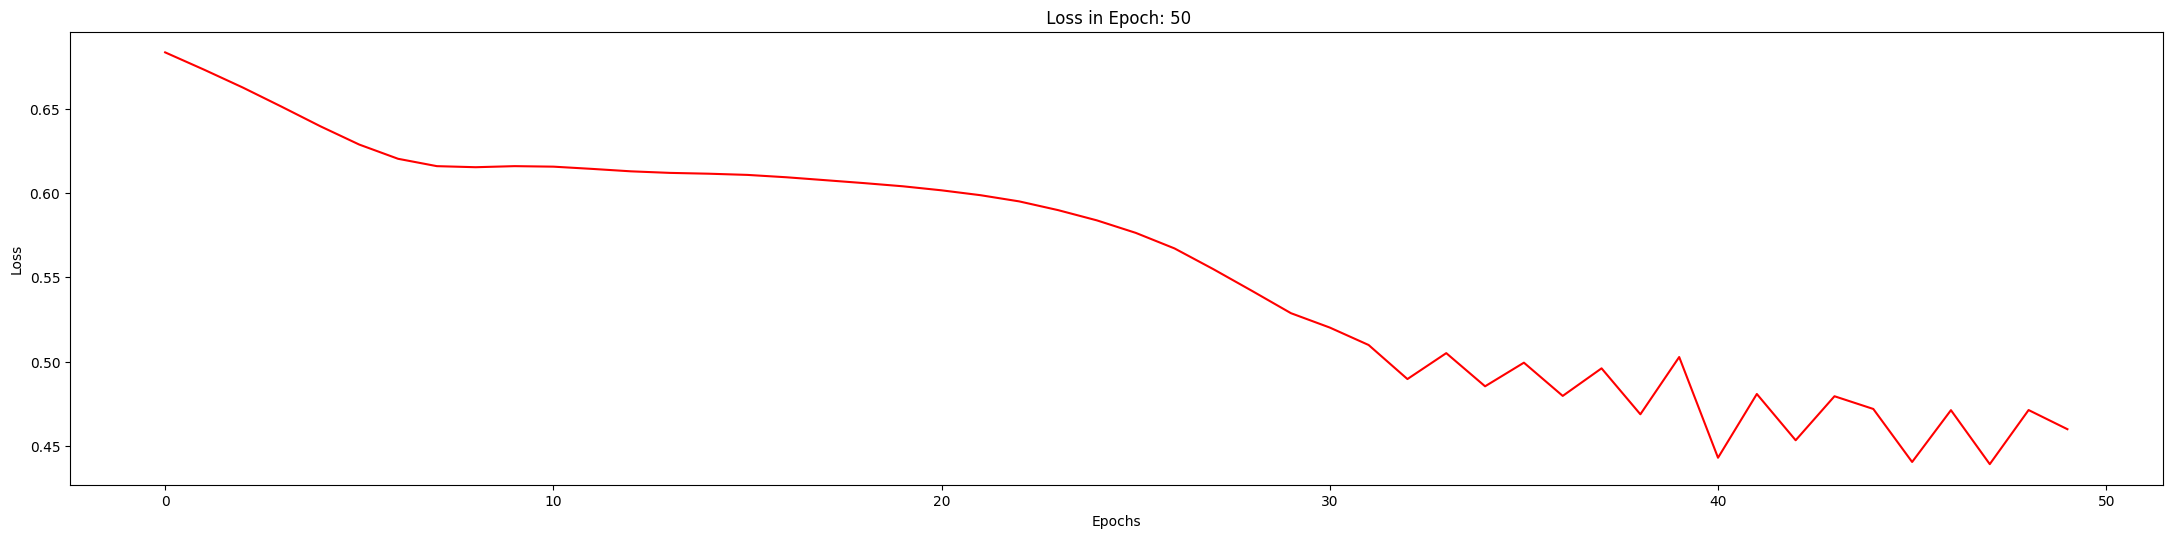

Epoch: 051, Model Loss: 0.4288
Epoch: 052, Model Loss: 0.4576
Epoch: 053, Model Loss: 0.4328
Epoch: 054, Model Loss: 0.4552
Epoch: 055, Model Loss: 0.4580
Epoch: 056, Model Loss: 0.4148
Epoch: 057, Model Loss: 0.4367
Epoch: 058, Model Loss: 0.4269
Epoch: 059, Model Loss: 0.4349
Epoch: 060, Model Loss: 0.4482
Epoch: 061, Model Loss: 0.4117
Epoch: 062, Model Loss: 0.4182
Epoch: 063, Model Loss: 0.4197
Epoch: 064, Model Loss: 0.4221
Epoch: 065, Model Loss: 0.4362
Epoch: 066, Model Loss: 0.4143
Epoch: 067, Model Loss: 0.4091
Epoch: 068, Model Loss: 0.4133
Epoch: 069, Model Loss: 0.4201
Epoch: 070, Model Loss: 0.4284
Epoch: 071, Model Loss: 0.4054
Epoch: 072, Model Loss: 0.4083
Epoch: 073, Model Loss: 0.4145
Epoch: 074, Model Loss: 0.4256
Epoch: 075, Model Loss: 0.4068
Epoch: 076, Model Loss: 0.4044
Epoch: 077, Model Loss: 0.4100
Epoch: 078, Model Loss: 0.4232
Epoch: 079, Model Loss: 0.4085
Epoch: 080, Model Loss: 0.4019
Epoch: 081, Model Loss: 0.4072
Epoch: 082, Model Loss: 0.4205
Epoch: 0

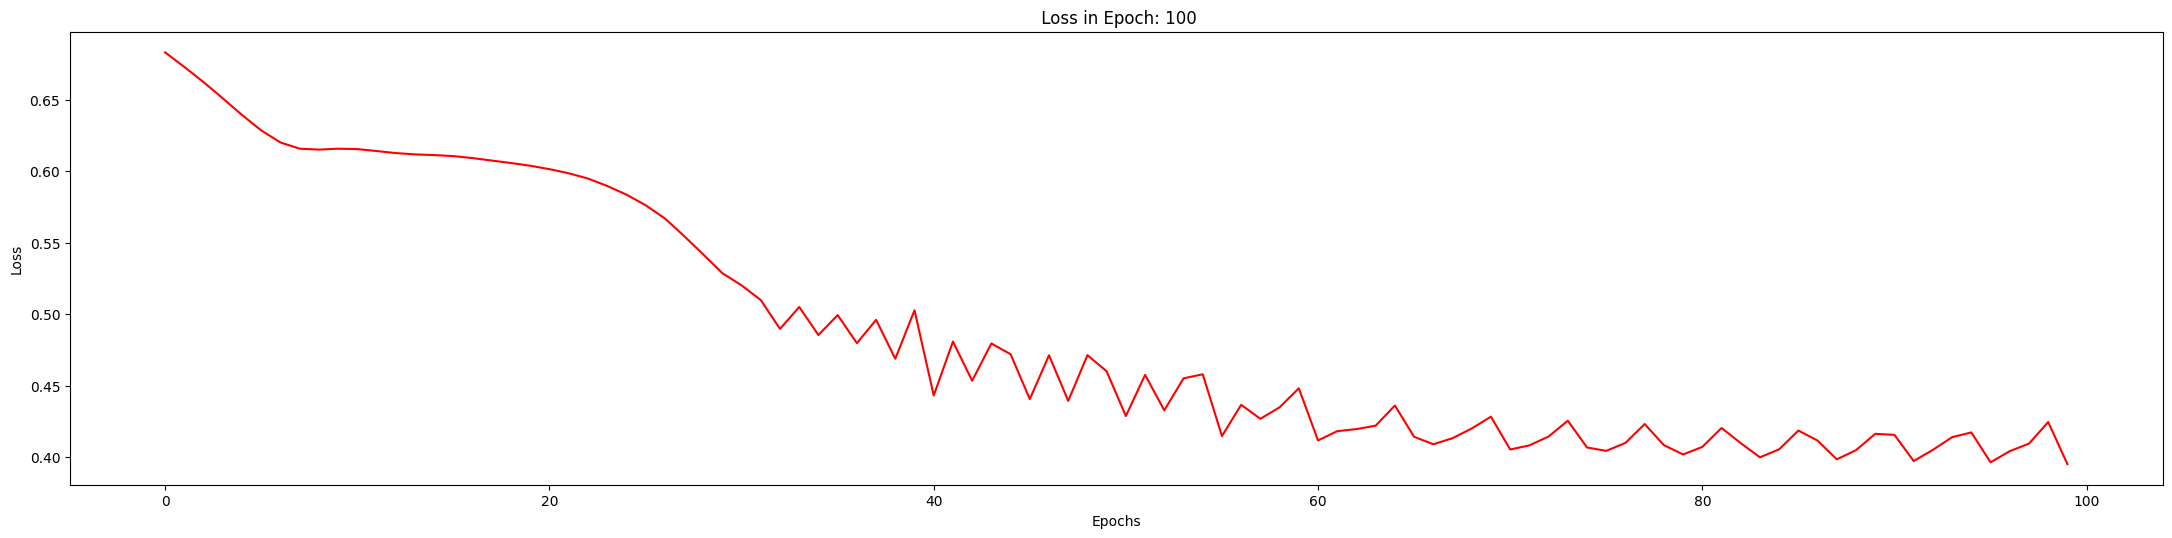

Epoch: 101, Model Loss: 0.4054
Epoch: 102, Model Loss: 0.4062
Epoch: 103, Model Loss: 0.4300
Epoch: 104, Model Loss: 0.3958
Epoch: 105, Model Loss: 0.4031
Epoch: 106, Model Loss: 0.4045
Epoch: 107, Model Loss: 0.4227
Epoch: 108, Model Loss: 0.4015
Epoch: 109, Model Loss: 0.3985
Epoch: 110, Model Loss: 0.4030
Epoch: 111, Model Loss: 0.4156
Epoch: 112, Model Loss: 0.4077
Epoch: 113, Model Loss: 0.3959
Epoch: 114, Model Loss: 0.4026
Epoch: 115, Model Loss: 0.4101
Epoch: 116, Model Loss: 0.4174
Epoch: 117, Model Loss: 0.3940
Epoch: 118, Model Loss: 0.4047
Epoch: 119, Model Loss: 0.4050
Epoch: 120, Model Loss: 0.4293
Epoch: 121, Model Loss: 0.3929
Epoch: 122, Model Loss: 0.4057
Epoch: 123, Model Loss: 0.4038
Epoch: 124, Model Loss: 0.4202
Epoch: 125, Model Loss: 0.4037
Epoch: 126, Model Loss: 0.3964
Epoch: 127, Model Loss: 0.4026
Epoch: 128, Model Loss: 0.4094
Epoch: 129, Model Loss: 0.4204
Epoch: 130, Model Loss: 0.3926
Epoch: 131, Model Loss: 0.4057
Epoch: 132, Model Loss: 0.4033
Epoch: 1

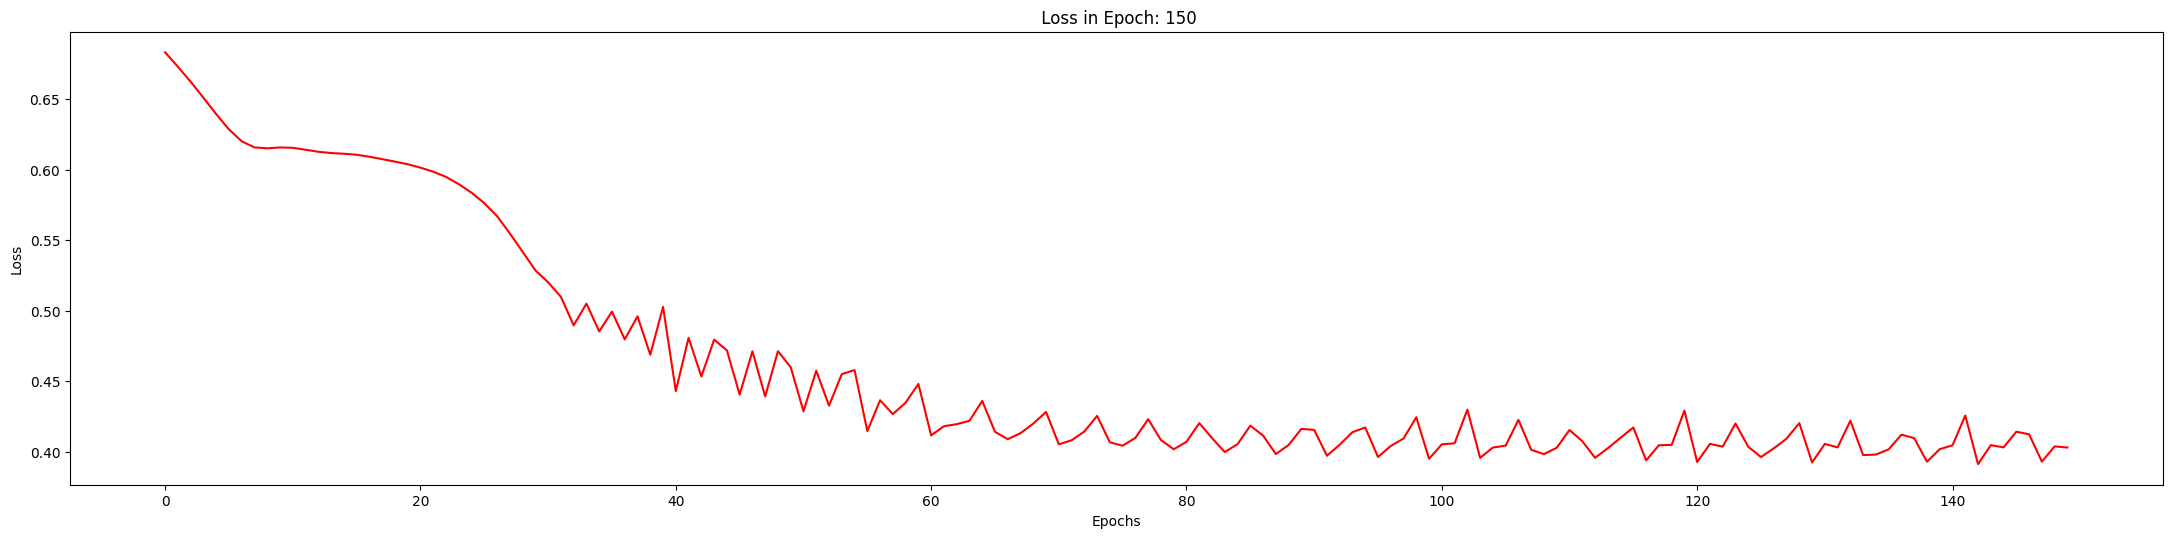

Epoch: 151, Model Loss: 0.4256
Epoch: 152, Model Loss: 0.3927
Epoch: 153, Model Loss: 0.4015
Epoch: 154, Model Loss: 0.4026
Epoch: 155, Model Loss: 0.4118
Epoch: 156, Model Loss: 0.4166
Epoch: 157, Model Loss: 0.3920
Epoch: 158, Model Loss: 0.4032
Epoch: 159, Model Loss: 0.4025
Epoch: 160, Model Loss: 0.4227
Epoch: 161, Model Loss: 0.3956
Epoch: 162, Model Loss: 0.3992
Epoch: 163, Model Loss: 0.4024
Epoch: 164, Model Loss: 0.4090
Epoch: 165, Model Loss: 0.4209
Epoch: 166, Model Loss: 0.3911
Epoch: 167, Model Loss: 0.4037
Epoch: 168, Model Loss: 0.4018
Epoch: 169, Model Loss: 0.4163
Epoch: 170, Model Loss: 0.4066
Epoch: 171, Model Loss: 0.3941
Epoch: 172, Model Loss: 0.4012
Epoch: 173, Model Loss: 0.4043
Epoch: 174, Model Loss: 0.4199
Epoch: 175, Model Loss: 0.3906
Epoch: 176, Model Loss: 0.4016
Epoch: 177, Model Loss: 0.4010
Epoch: 178, Model Loss: 0.4135
Epoch: 179, Model Loss: 0.4089
Epoch: 180, Model Loss: 0.3926
Epoch: 181, Model Loss: 0.4010
Epoch: 182, Model Loss: 0.4054
Epoch: 1

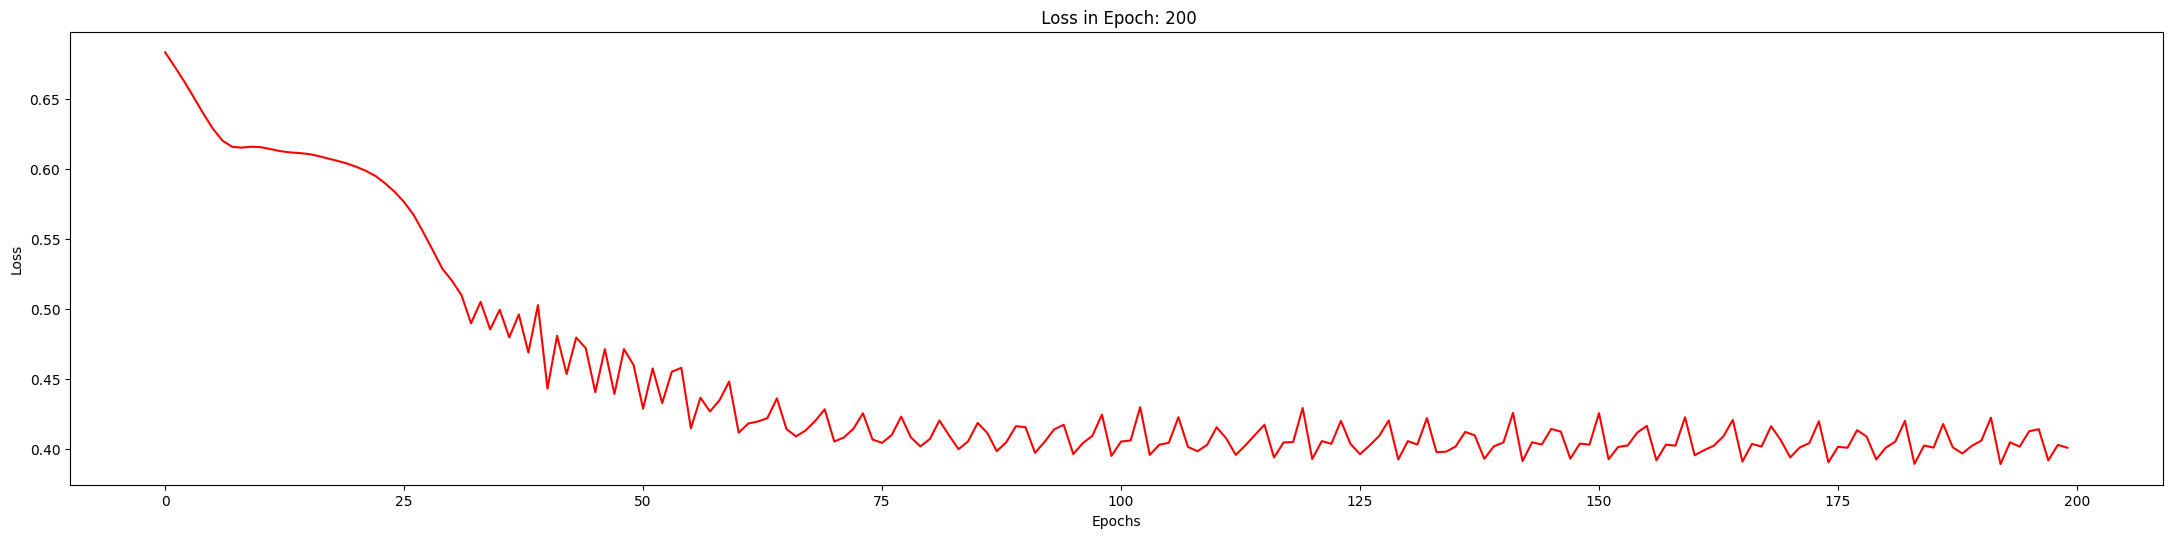

Epoch: 201, Model Loss: 0.4154
Epoch: 202, Model Loss: 0.3959
Epoch: 203, Model Loss: 0.3975
Epoch: 204, Model Loss: 0.4004
Epoch: 205, Model Loss: 0.4095
Epoch: 206, Model Loss: 0.4150
Epoch: 207, Model Loss: 0.3913
Epoch: 208, Model Loss: 0.4056
Epoch: 209, Model Loss: 0.4005
Epoch: 210, Model Loss: 0.4225
Epoch: 211, Model Loss: 0.3912
Epoch: 212, Model Loss: 0.4034
Epoch: 213, Model Loss: 0.4055
Epoch: 214, Model Loss: 0.4067
Epoch: 215, Model Loss: 0.4295
Epoch: 216, Model Loss: 0.3879
Epoch: 217, Model Loss: 0.4080
Epoch: 218, Model Loss: 0.4091
Epoch: 219, Model Loss: 0.4045
Epoch: 220, Model Loss: 0.4261
Epoch: 221, Model Loss: 0.3920
Epoch: 222, Model Loss: 0.4076
Epoch: 223, Model Loss: 0.4167
Epoch: 224, Model Loss: 0.4070
Epoch: 225, Model Loss: 0.4092
Epoch: 226, Model Loss: 0.4331
Epoch: 227, Model Loss: 0.3883
Epoch: 228, Model Loss: 0.4100
Epoch: 229, Model Loss: 0.4102
Epoch: 230, Model Loss: 0.4035
Epoch: 231, Model Loss: 0.4192
Epoch: 232, Model Loss: 0.4001
Epoch: 2

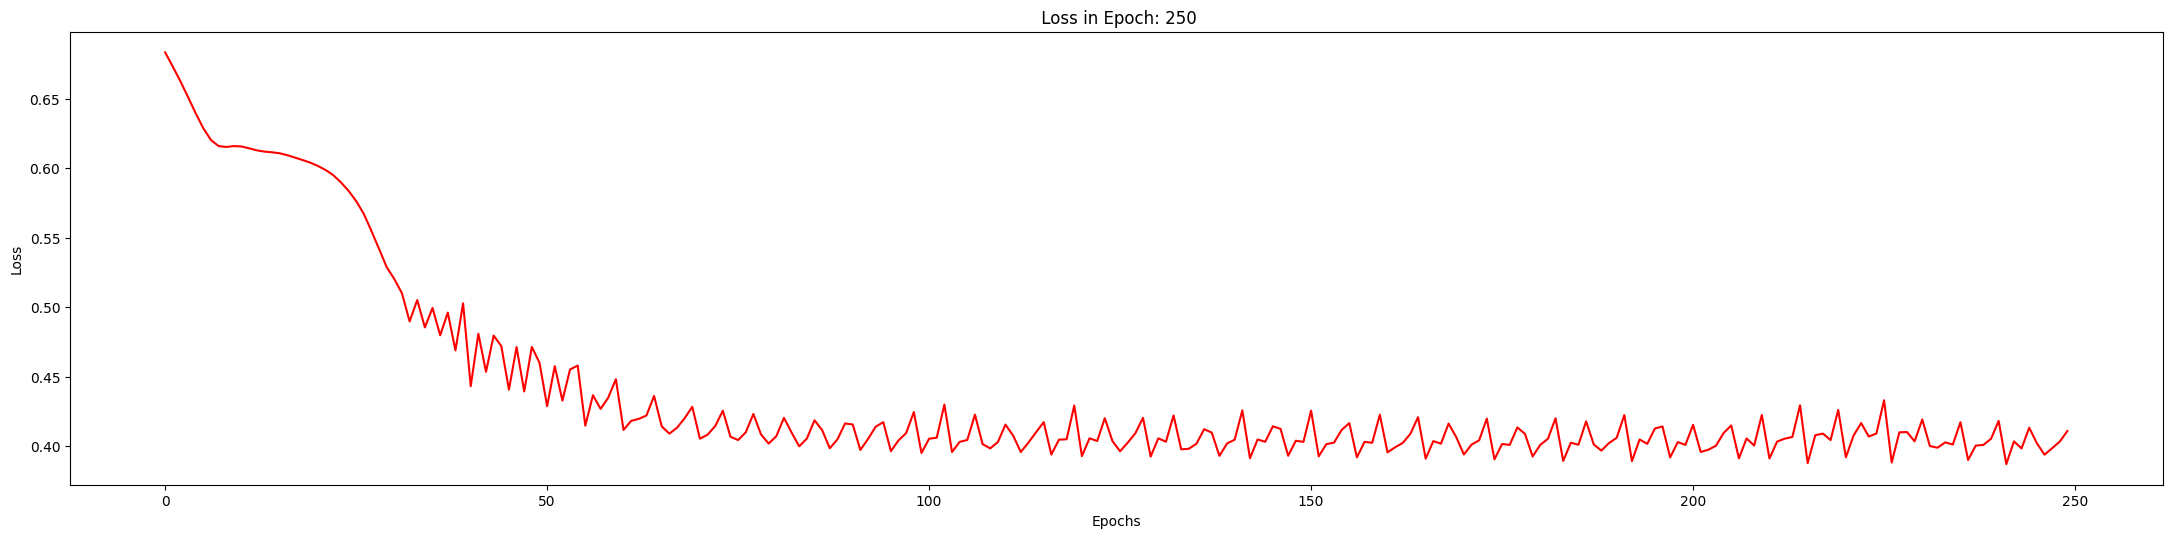

Epoch: 251, Model Loss: 0.3867
Epoch: 252, Model Loss: 0.3998
Epoch: 253, Model Loss: 0.3993
Epoch: 254, Model Loss: 0.4207
Epoch: 255, Model Loss: 0.3843
Epoch: 256, Model Loss: 0.4073
Epoch: 257, Model Loss: 0.4004
Epoch: 258, Model Loss: 0.4125
Epoch: 259, Model Loss: 0.4143
Epoch: 260, Model Loss: 0.3878
Epoch: 261, Model Loss: 0.3984
Epoch: 262, Model Loss: 0.3994
Epoch: 263, Model Loss: 0.4131
Epoch: 264, Model Loss: 0.3831
Epoch: 265, Model Loss: 0.4020
Epoch: 266, Model Loss: 0.3956
Epoch: 267, Model Loss: 0.4289
Epoch: 268, Model Loss: 0.3896
Epoch: 269, Model Loss: 0.4111
Epoch: 270, Model Loss: 0.4219
Epoch: 271, Model Loss: 0.4105
Epoch: 272, Model Loss: 0.4062
Epoch: 273, Model Loss: 0.4289
Epoch: 274, Model Loss: 0.3848
Epoch: 275, Model Loss: 0.4125
Epoch: 276, Model Loss: 0.4188
Epoch: 277, Model Loss: 0.4030
Epoch: 278, Model Loss: 0.4125
Epoch: 279, Model Loss: 0.4276
Epoch: 280, Model Loss: 0.3841
Epoch: 281, Model Loss: 0.4097
Epoch: 282, Model Loss: 0.4102
Epoch: 2

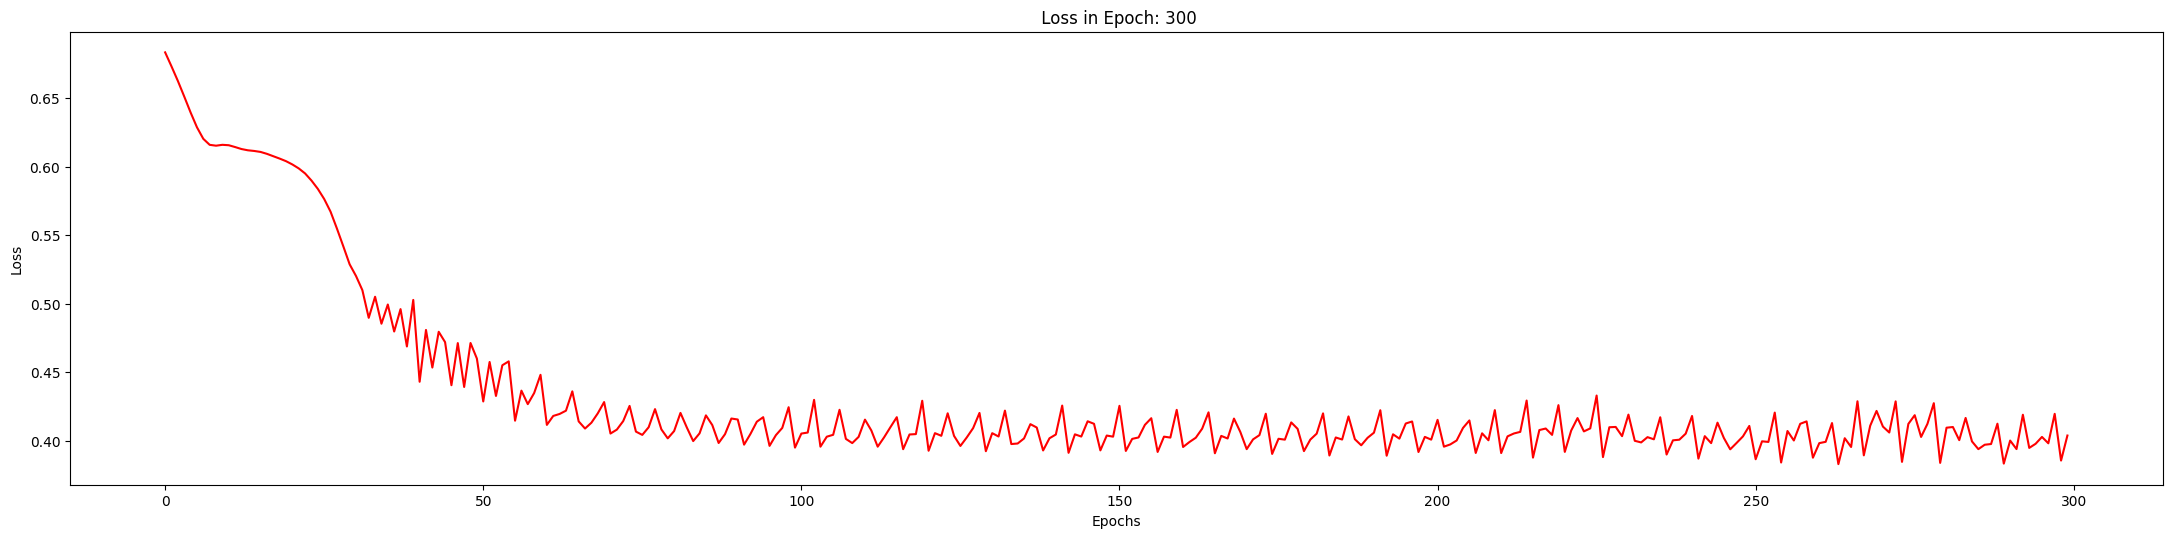

In [14]:
EPOCHS = 300
load_index = 0

train(EPOCHS, load_index)

In [15]:
GNN_Model_test_predicted_labels = []
def GNN_Model_test(test_loader):
    GNN_Model.eval()
    correct = 0
    for batch_of_graphs in test_loader:

        concatination_list_of_poolings, softmaxed_h2 = GNN_Model(batch_of_graphs, None)
        GNN_Model_test_pred = softmaxed_h2.argmax(dim=1) .tolist()[0]
        GNN_Model_test_predicted_labels.append(GNN_Model_test_pred)
        correct += int((GNN_Model_test_pred == batch_of_graphs.y).sum())
    return correct / len(test_loader.dataset), GNN_Model_test_predicted_labels

In [16]:
GNN_Model_test_acc, predicted_labels = GNN_Model_test(test_dataloader)
print(f'Test Accuracy: {GNN_Model_test_acc:.4f}')

Test Accuracy: 0.6579


In [17]:
def instance_time(test_dataset):
    instance_based_time = []
    GNN_Model.eval()
    correct = 0
    for batched_data in test_dataset:
        start_generation = perf_counter()
        concatination_list_of_poolings, softmaxed_h2 = GNN_Model(batched_data, None)
        GNN_Model_test_pred = softmaxed_h2.argmax(dim=1)
        consumed_time = perf_counter() - start_generation
        instance_based_time.append(consumed_time)
    return instance_based_time

In [18]:
samples_time = instance_time(test_dataset)
print(f'Test Instance based Time: {samples_time}')

Test Instance based Time: [0.006992230999969706, 0.005613369999991846, 0.002566649000016241, 0.0022851539999919623, 0.00224189400000796, 0.002207903999988048, 0.002324697999995351, 0.002187386000002789, 0.00217288499999313, 0.0022428810000292287, 0.004041321999977754, 0.002845415999956913, 0.0024030469999729576, 0.0021425740000040605, 0.002164545000027829, 0.0021632739999972728, 0.002080823000028431, 0.002171204999967813, 0.0032469159999664043, 0.0022241749999807325, 0.0021046139999612024, 0.0021610960000089108, 0.0022219240000254104, 0.0021206040000265602, 0.002128610999989178, 0.00211672699998644, 0.0021223860000532113, 0.0021632549999708317, 0.0021080600000118466, 0.002137421999975686, 0.002168194000034873, 0.0020595619999994597, 0.002092210000000705, 0.0020243649999542868, 0.002088915999991059, 0.0021008800000004157, 0.0022145849999901657, 0.002323516999979347]


In [19]:
real_labels = []
for graph in test_dataloader:
    real_labels.append(graph.y.tolist()[0])

In [20]:
print("predicted_labels: ", predicted_labels)
print("real_labels: ", real_labels)
print("Test Accuracy: ", metrics.accuracy_score(real_labels, predicted_labels))

predicted_labels:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
real_labels:  [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
Test Accuracy:  0.6578947368421053


In [ ]:
Auc_Roc = metrics.roc_auc_score(real_labels, predicted_labels)
precision, recall, thresholds = metrics.precision_recall_curve(real_labels, predicted_labels)
Auc_Prc = metrics.auc(y=precision, x=recall)
Acc = metrics.accuracy_score(real_labels, predicted_labels, normalize=True)
Acc2 = metrics.accuracy_score(real_labels, predicted_labels, normalize=False)
print("Auc_Roc: ", Auc_Roc, "Auc_Prc: ", Auc_Prc, "Acc: ", Acc, "Acc2: ", Acc2)

Auc_Roc:  0.7321428571428571 Auc_Prc:  0.8630382775119618 Acc:  0.7368421052631579 Acc2:  28


In [ ]:
def power_divergence(X, Y, Z, data_pertubed_Samples, lambda_, significance_level):
    if hasattr(Z, "__iter__"):
        Z = list(Z)
    else:
        raise (f"Z must be an iterable. Got object type: {type(Z)}")

    if (X in Z) or (Y in Z):
        raise ValueError(f"The variables X or Y can't be in Z. Found {X if X in Z else Y} in Z.")
    if len(Z) == 0:
        chi, p_value, dof, expected = stats.chi2_contingency(
            data_pertubed_Samples.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
        )
    else:
        chi = 0
        dof = 0
        for z_state, df in data_pertubed_Samples.groupby(Z):
            try:
                c, _, d, _ = stats.chi2_contingency(df.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_)
                chi += c
                dof += d
            except ValueError:
                if isinstance(z_state, str):
                    logging.info(f"Skipping the test {X} \u27C2 {Y} | {Z[0]}={z_state}. Not enough samples")
                else:
                    z_str = ", ".join([f"{var}={state}" for var, state in zip(Z, z_state)])
                    logging.info(f"Skipping the test {X} \u27C2 {Y} | {z_str}. Not enough samples")
        p_value = 1 - stats.chi2.cdf(chi, df=dof)
    return chi, p_value, dof

In [ ]:
def cressie_read(X, Y, Z, data_pertubed_Samples, significance_level):
    return power_divergence(X=X, Y=Y, Z=Z, data_pertubed_Samples=data_pertubed_Samples, lambda_="cressie-read", significance_level=significance_level)

In [ ]:
x = [3.01599503e-05, 0.00000000e+00, 2, 3.01599503e-05, 1]
y = np.array(x)
print(y)
z = np.argsort(y)[-3:]
print(z)

[3.01599503e-05 0.00000000e+00 2.00000000e+00 3.01599503e-05
 1.00000000e+00]
[3 4 2]


In [21]:
class PGM_Graph_Explainer(object):
    def __init__(self, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim, graph, perturb_feature_list, perturb_mode, perturb_indicator):
        self.Model_Name = Model_Name
        self.Task_name = 'Graph Classification'
        self.Explainability_name = "PGMExplainer"
        self.your_model = self.load_model(Task_name=self.Task_name, Explainability_name=self.Explainability_name, Model_Name=Model_Name,
                                          classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim, output_dim=output_dim)
        self.your_model.eval()

        self.graph = graph
        self.num_layers = 2
        self.perturb_feature_list = perturb_feature_list
        self.perturb_mode = perturb_mode
        self.perturb_indicator = perturb_indicator
        self.node_feat = graph.x.numpy()


    def load_model(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):

        if classifier_load_index != 0:
            GNN_Model, optimizer, classifier_load_index = self.loading_config(Task_name=Task_name, Explainability_name=Explainability_name, Model_Name=Model_Name,
                                                                              classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim,
                                                                              output_dim=output_dim)
            return GNN_Model
        else:

            GNN_Model = diffpool_model.DIFFPOOL_Model(embedding_input_dim=7, embedding_num_block_layers=1, embedding_hid_dim=64,
                                          new_feature_size=64, assignment_input_dim=7, assignment_num_block_layers=1,
                                          assignment_hid_dim=64, max_number_of_nodes=256, prediction_hid_layers=[50],
                                          concat_neighborhood=False, num_classes=2, Weight_Initializer=1, Bias=classifier_bias,
                                          dropout_rate=0, normalize_graphsage=False, aggregation="mean", act_fun="ReLu",
                                          concat_diffpools_outputs=True, num_pooling=1, pooling="mean")
            return GNN_Model

    def loading_config(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):

        GNN_Model = diffpool_model.DIFFPOOL_Model(embedding_input_dim=7, embedding_num_block_layers=1, embedding_hid_dim=64,
                                          new_feature_size=64, assignment_input_dim=7, assignment_num_block_layers=1,
                                          assignment_hid_dim=64, max_number_of_nodes=256, prediction_hid_layers=[50],
                                          concat_neighborhood=False, num_classes=2, Weight_Initializer=1, Bias=classifier_bias,
                                          dropout_rate=0, normalize_graphsage=False, aggregation="mean", act_fun="ReLu",
                                          concat_diffpools_outputs=True, num_pooling=1, pooling="mean")
        optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)
        checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(classifier_load_index)+".pt")
        GNN_Model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']

        return GNN_Model, optimizer, epoch

    def cressie_read(self, X, Y, Z, data_pertubed_Samples, significance_level):
        return self.power_divergence(X=X, Y=Y, Z=Z, data_pertubed_Samples=data_pertubed_Samples, lambda_="cressie-read", significance_level=significance_level)

    def power_divergence(self, X, Y, Z, data_pertubed_Samples, lambda_, significance_level):
        if hasattr(Z, "__iter__"):
            Z = list(Z)
        else:
            raise (f"Z must be an iterable. Got object type: {type(Z)}")

        if (X in Z) or (Y in Z):
            raise ValueError(f"The variables X or Y can't be in Z. Found {X if X in Z else Y} in Z.")
        if len(Z) == 0:
            chi, p_value, dof, expected = stats.chi2_contingency(
                data_pertubed_Samples.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
            )
        else:
            chi = 0
            dof = 0
            for z_state, df in data_pertubed_Samples.groupby(Z):
                try:
                    c, _, d, _ = stats.chi2_contingency(df.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_)
                    chi += c
                    dof += d
                except ValueError:
                    if isinstance(z_state, str):
                        logging.info(f"Skipping the test {X} \u27C2 {Y} | {Z[0]}={z_state}. Not enough samples")
                    else:
                        z_str = ", ".join([f"{var}={state}" for var, state in zip(Z, z_state)])
                        logging.info(f"Skipping the test {X} \u27C2 {Y} | {z_str}. Not enough samples")
            p_value = 1 - stats.chi2.cdf(chi, df=dof)
        return chi, p_value, dof


    def perturb_node_features(self, node_feature_matrix, targeted_node_idx, random_perturbation_permission):

        graph_node_features = deepcopy(node_feature_matrix)
        targeted_node_feat_to_perturb_array = deepcopy(graph_node_features[targeted_node_idx])
        # print("targeted_node_feat_to_perturb_array: ", targeted_node_feat_to_perturb_array)
        epsilon = 0.05 * np.max(self.node_feat, axis = 0)

        if random_perturbation_permission == 1:
            for i in range(targeted_node_feat_to_perturb_array.shape[0]):
                if i in self.perturb_feature_list:
                    if self.perturb_mode == "mean":
                        targeted_node_feat_to_perturb_array[i] = np.mean(node_feature_matrix[:,i])
                    elif self.perturb_mode == "zero":
                        targeted_node_feat_to_perturb_array[i] = 0
                    elif self.perturb_mode == "max":
                        targeted_node_feat_to_perturb_array[i] = np.max(node_feature_matrix[:,i])
                    elif self.perturb_mode == "uniform":
                        targeted_node_feat_to_perturb_array[i] = targeted_node_feat_to_perturb_array[i] + np.random.uniform(low=-epsilon[i], high=epsilon[i])
                        if targeted_node_feat_to_perturb_array[i] < 0:
                            targeted_node_feat_to_perturb_array[i] = 0
                        elif targeted_node_feat_to_perturb_array[i] > np.max(self.node_feat, axis = 0)[i]:
                            targeted_node_feat_to_perturb_array[i] = np.max(self.node_feat, axis = 0)[i]


        graph_node_features[targeted_node_idx] = targeted_node_feat_to_perturb_array

        return graph_node_features

    def gather_perturbed_node_features(self, sampling_count, index_to_perturb, percentage, p_value_threshold, pred_threshold):

        concatination_list_of_poolings, pred_torch = GNN_Model(self.graph, None)
        pred_label = pred_torch.argmax(dim=1)

        num_nodes_in_graph = self.node_feat.shape[0]

        Samples = []
        for iteration in range(sampling_count):
            graph_original_features = deepcopy(self.node_feat)
            sample = []
            for node_index in range(num_nodes_in_graph):
                if node_index in index_to_perturb:
                    seed = np.random.randint(100)
                    if seed < percentage:
                        random_perturbation_permission = 1
                        graph_perturbed_features = self.perturb_node_features(node_feature_matrix=graph_original_features, targeted_node_idx=node_index,
                                                                              random_perturbation_permission=random_perturbation_permission)
                    else:
                        random_perturbation_permission = 0
                else:
                    random_perturbation_permission = 0
                sample.append(random_perturbation_permission)

                perturbed_graph = deepcopy(self.graph)
                if random_perturbation_permission:
                    graph_perturbed_features_torch =  torch.tensor(graph_perturbed_features, dtype=torch.float)
                    perturbed_graph.x = graph_perturbed_features_torch

                concatination_list_of_poolings, pred_perturb_torch = GNN_Model(perturbed_graph, None)


                pred_change = max(pred_torch[0].tolist()) - pred_perturb_torch[0].tolist()[pred_label]

                sample.append(pred_change)
            Samples.append(sample)

        Samples = np.asarray(Samples)
        if self.perturb_indicator == "abs":
            Samples = np.abs(Samples)

        top = int(sampling_count/8)
        top_idx = np.argsort(Samples[:, num_nodes_in_graph])[-top:]

        for i in range(sampling_count):
            if i in top_idx:
                Samples[i,num_nodes_in_graph] = 1
            else:
                Samples[i,num_nodes_in_graph] = 0

        return Samples

    def explain(self, num_samples, percentage, top_node, p_value_threshold, pred_threshold, ctg):


        if top_node == None:
            top_node = int(self.node_feat.shape[0]/8)

#         Round 1
        Samples = self.gather_perturbed_node_features(sampling_count=num_samples, index_to_perturb=range(self.node_feat.shape[0]), percentage=percentage,
                                                      p_value_threshold=p_value_threshold, pred_threshold=pred_threshold)
        #print(len(Samples[0]), " Samples: ", list(Samples))
        data_pertubed_Samples1 = pd.DataFrame(Samples)
        #est = ConstraintBasedEstimator(data)

        p_values = []
        candidate_nodes = []
        # The entry for the graph classification data is at "num_nodes"
        for node in range(self.node_feat.shape[0]):
            chi2, p, dof = self.cressie_read(X=node, Y=self.node_feat.shape[0], Z=[], data_pertubed_Samples=data_pertubed_Samples1, significance_level=0.05)
            #print("this is returned P: ", p)
            p_values.append(p)


        number_candidates = top_node
        candidate_nodes = np.argpartition(p_values, number_candidates)[0:number_candidates]

#         Round 2
        Samples = self.gather_perturbed_node_features(sampling_count=num_samples, index_to_perturb=candidate_nodes, percentage=percentage,
                                                      p_value_threshold=p_value_threshold, pred_threshold=pred_threshold)
        data = pd.DataFrame(Samples)
        #est = ConstraintBasedEstimator(data)

        p_values = []
        dependent_nodes = []

        for node in range(self.node_feat.shape[0]):
            chi2, p, dof = self.cressie_read(X=node, Y=self.node_feat.shape[0], Z=[], data_pertubed_Samples=data, significance_level=0.05)
            #chi2, p = chi_square(node, target, [], data)
            p_values.append(p)
            if p < p_value_threshold:
                dependent_nodes.append(node)

        if ctg == 'correct':
            top_p = np.min((top_node, self.node_feat.shape[0]-1))
        elif ctg == 'incorrect':
            top_p = np.max((top_node, self.node_feat.shape[0]-1))
        ind_top_p = np.argpartition(p_values, top_p)[0:top_p]
        pgm_nodes = list(ind_top_p)

        return pgm_nodes, p_values, candidate_nodes, dependent_nodes

input_graph = dataset[0]
pgmx = PGM_Graph_Explainer(Model_Name="DIFFPOOL", classifier_load_index=300, input_dim=7, hid_dim=7, output_dim=2, graph=input_graph,
                           perturb_feature_list=[None], perturb_mode = "mean", perturb_indicator = "abs")



pgm_nodes, p_values, candidate_nodes, dependent_nodes = pgmx.explain(num_samples=len(input_graph.x), percentage=50, top_node=3, p_value_threshold=0.05,
                                                                     pred_threshold=0.1, ctg='correct')
print("pgm_nodes: ", pgm_nodes, " p_values: ", p_values, " candidate_nodes: ", candidate_nodes, "dependent_nodes: ", dependent_nodes)

ReLu is Selected.
pgm_nodes:  [12, 14, 11]  p_values:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]  candidate_nodes:  [16  8 14] dependent_nodes:  []


In [22]:
pgm_nodes_for_each_graph_correct = []
pgm_nodes_for_each_graph_incorrect = []
time_consumption = []

for i in range(len(test_dataset)):

    pgmx = PGM_Graph_Explainer(Model_Name="DIFFPOOL", classifier_load_index=300, input_dim=7, hid_dim=7, output_dim=2, graph=test_dataset[i],
                           perturb_feature_list=[None], perturb_mode = "mean", perturb_indicator = "abs")
    start_time = perf_counter()
    pgm_node_correct, p_values_correct, candidate_nodes_correct, dependent_nodes_correct = pgmx.explain(num_samples=len(test_dataset[i].x), percentage=50,
                                                                                                        top_node=3, p_value_threshold=0.05, pred_threshold=0.1,
                                                                                                        ctg='correct')
    pgm_nodes_for_each_graph_correct.append(pgm_node_correct)
    print(pgm_node_correct)
    time_consumption.append(perf_counter() - start_time)
    pgm_node_incorrect, p_values_incorrect, candidate_nodes_incorrect, dependent_nodes_incorrect = pgmx.explain(num_samples=len(test_dataset[i].x), percentage=50,
                                                                                                                top_node=3, p_value_threshold=0.05, pred_threshold=0.1,
                                                                                                                ctg='incorrect')
    pgm_nodes_for_each_graph_incorrect.append(pgm_node_incorrect)
    print(pgm_node_incorrect)



ReLu is Selected.
[4, 8, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
ReLu is Selected.
[9, 11, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ReLu is Selected.
[4, 8, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ReLu is Selected.
[9, 10, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ReLu is Selected.
[4, 15, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
ReLu is Selected.
[8, 12, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
ReLu is Selected.
[18, 16, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
ReLu is Selected.
[10, 12, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ReLu is Selected.
[4, 14, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
ReLu is Selected.
[0, 12, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
ReLu is Selected.
[9, 10, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ReLu is Selected.
[17, 15, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
ReLu is Selected.
[15, 14, 

In [23]:
print(len(time_consumption))
print("time_consumption: ", time_consumption)
print(statistics.mean(time_consumption))

38
time_consumption:  [1.6756558529999666, 1.1539752190000172, 1.3534453269999744, 0.8161448470000323, 2.1987235159999727, 8.337182054000039, 2.6701416099999733, 1.0805667750000225, 2.269530601999975, 2.5716742230000023, 0.7974210790000029, 5.3734475560000305, 4.559963238999956, 3.3829440270000077, 4.739887164000038, 0.549759025999947, 1.8340184290000252, 3.4269019380000145, 1.5272642840000117, 4.210736865999991, 0.9820405080000114, 1.4189246560000015, 4.512483983000038, 1.6251673060000371, 1.2372952059999989, 0.81368446700003, 3.376325694000002, 2.0183238289999963, 1.369722945000035, 2.5150619500000175, 1.6300927960000422, 0.8660366230000136, 1.6021857480000108, 0.8182204970000271, 2.486977283999977, 1.1714019570000005, 0.9771697410000115, 2.7210956359999727]
2.2808314331579007


In [24]:
test_dataset_dropped_correct = deepcopy(test_dataset)
test_dataset_dropped_incorrect = deepcopy(test_dataset)


for i in range(len(pgm_nodes_for_each_graph_correct)):
    for j in range(len(test_dataset_dropped_correct[i].x)):
        if j not in pgm_nodes_for_each_graph_correct[i]:
            test_dataset_dropped_correct[i].x[j] = torch.zeros_like(test_dataset_dropped_correct[i].x[j])

for i in range(len(pgm_nodes_for_each_graph_incorrect)):
    for j in range(len(test_dataset_dropped_incorrect[i].x)):
        if j not in pgm_nodes_for_each_graph_incorrect[i]:
            test_dataset_dropped_incorrect[i].x[j] = torch.zeros_like(test_dataset_dropped_incorrect[i].x[j])


In [25]:
print(pgm_nodes_for_each_graph_correct[0])
print(test_dataset_dropped_correct[0].x)

[4, 8, 12]
tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])


In [26]:
class0_listed = []
for graph in test_dataset_dropped_correct:
    graph_list = []
    for node in graph.x:
        graph_list.append(max(node).tolist())
    class0_listed.append(graph_list)
print(class0_listed)

class1_listed = []
for graph in test_dataset_dropped_incorrect:
    graph_list = []
    for node in graph.x:
        graph_list.append(max(node).tolist())
    class1_listed.append(graph_list)
print(class1_listed)

[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0,

In [27]:
import sys
from importlib import reload
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_fidelity_plus as eval_xai_fid_plus
eval_xai_fid_plus = reload(eval_xai_fid_plus)

In [28]:
fid_xmethod_example_2 = eval_xai_fid_plus.evalaution_of_xmethods_fidelity_plus(a_trained_model=GNN_Model, test_data=test_dataset)
fid_score2 = fid_xmethod_example_2.my_fidelity(saliency_class0=class0_listed, saliency_class1=class1_listed, importance_threshold=0.5,
                                               style="Node")
print(fid_score2)

0.2425595238095239


In [29]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_contrastivity as eval_xai_contrastivity
eval_xai_contrastivity = reload(eval_xai_contrastivity)

In [30]:
contrastivity_xmethod_example = eval_xai_contrastivity.evalaution_of_xmethods_contrastivity(a_trained_model=GNN_Model,
                                                                                            test_data=test_dataset)
contrastivity_score = contrastivity_xmethod_example.my_contrastivity(test_dataset, class0_listed, class1_listed, importance_threshold=0.5,
                                                                     contrast_coeff=1)
print("Contrastivity_Score: ", contrastivity_score)

Contrastivity_Score:  0.7469189926197669


In [31]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_sparsity as eval_xai_sparsity
eval_xai_sparsity = reload(eval_xai_sparsity)

In [32]:
sparsity_xmethod_example = eval_xai_sparsity.evalaution_of_xmethods_sparsity(a_trained_model=GNN_Model, test_data=test_dataset)
sparsity_score = sparsity_xmethod_example.my_sparsity(test_dataset, class0_listed, class1_listed, importance_threshold=0.5)
print("Sparsity_Score: ", sparsity_score)

Sparsity_Score:  0.43620343236546805


In [39]:
Model_Load_iNdex = 300

GNN_Model = diffpool_model.DIFFPOOL_Model(embedding_input_dim=7, embedding_num_block_layers=1, embedding_hid_dim=64,
                                          new_feature_size=64, assignment_input_dim=7, assignment_num_block_layers=1,
                                          assignment_hid_dim=64, max_number_of_nodes=256, prediction_hid_layers=[50],
                                          concat_neighborhood=False, num_classes=2, Weight_Initializer=1, Bias=classifier_bias,
                                          dropout_rate=0, normalize_graphsage=False, aggregation="mean", act_fun="ReLu",
                                          concat_diffpools_outputs=True, num_pooling=1, pooling="mean")
optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)
checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(Model_Load_iNdex)+".pt")
GNN_Model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

ReLu is Selected.


In [40]:
def Compute_ROC_AUC(your_model, your_dataset, masked):
    preds = []
    reals = []
    if masked == False:
        your_model.eval()
        for batched_data in your_dataset:

            concatination_list_of_poolings, softmaxed_h2 = your_model(batched_data, None)
            preds.append(softmaxed_h2.cpu().detach())
    else:

        your_model.eval()
        for masked_batch in masked:

            concatination_list_of_poolings, softmaxed_h2 = your_model(masked_batch, None)
            preds.append(softmaxed_h2.cpu().detach())


    for i, batched_graph in enumerate(your_dataset):
        reals.append(batched_graph.y.cpu().detach().tolist())

    preds = torch.cat(preds)

    preds, max_idxs = torch.max(preds[:], dim=1)

    roc_auc = metrics.roc_auc_score(reals, preds, average='macro')
    return roc_auc


def Fidelity_computation(your_model, your_dataset, importance_threshold):
    auc_roc_before_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, False)
    print("auc_roc_before_droping_important_nodes: ", auc_roc_before_droping_important_nodes)

    auc_roc_after_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, test_dataset_dropped_correct)
    print("auc_roc_after_droping_important_nodes: ", auc_roc_after_droping_important_nodes)

    return auc_roc_before_droping_important_nodes - auc_roc_after_droping_important_nodes
fid0 = Fidelity_computation(GNN_Model, test_dataset, test_dataset_dropped_correct)
fid1 = Fidelity_computation(GNN_Model, test_dataset, test_dataset_dropped_incorrect)
print("Fidelity: ", statistics.mean([fid0, fid1]))

auc_roc_before_droping_important_nodes:  0.78125
auc_roc_after_droping_important_nodes:  0.5565476190476191
auc_roc_before_droping_important_nodes:  0.78125
auc_roc_after_droping_important_nodes:  0.5565476190476191
Fidelity:  0.22470238095238093


In [36]:
def crs_subgraph_saliency(your_dataset, masked_data_class0, masked_data_class1):
    binary_scores_class0 = []
    binary_scores_class1 = []
    for graph_main, graph0, graph1 in zip(your_dataset, masked_data_class0, masked_data_class1):
        binary_score_class0 = ''
        binary_score_class1 = ''
        for node_main, node0, node1 in zip(graph_main.x, graph0.x, graph1.x):
            if sum(node0) == 0:
                binary_score_class0 += '1'
            else:
                binary_score_class0 += '0'
            if sum(node1) == 0:
                binary_score_class1 += '1'
            else:
                binary_score_class1 += '0'
        binary_scores_class0.append(binary_score_class0)
        binary_scores_class1.append(binary_score_class1)
    #print("binary_scores_class0: ", binary_scores_class0)
    #print("binary_scores_class1: ", binary_scores_class1)
    return binary_scores_class0, binary_scores_class1

def hamming_distance(string1, string2):

    distance = 0
    L = len(string1)
    for i in range(L):
        if string1[i] != string2[i]:
            distance += 1
    return distance

def compute_contrastivity(your_dataset, masked_data_class0, masked_data_class1):
    binary_scores_class0, binary_scores_class1 = crs_subgraph_saliency(your_dataset, masked_data_class0, masked_data_class1)
    h_dist_list = []
    for cor_bin_scores, incor_bin_scores in zip(binary_scores_class0, binary_scores_class1):
        h_distance = hamming_distance(cor_bin_scores, incor_bin_scores)/len(cor_bin_scores)
        h_dist_list.append(h_distance)
    return statistics.mean(h_dist_list)



crs = compute_contrastivity(test_dataset, test_dataset_dropped_correct, test_dataset_dropped_incorrect)
print("Contrastivity: ", crs)

Contrastivity:  0.7540635508479165


In [38]:
def spr_subgraph_saliency(masked_data_class0, masked_data_class1):
    binary_scores_class0 = []
    binary_scores_class1 = []
    for graph0, graph1 in zip(masked_data_class0, masked_data_class1):
        binary_score_class0 = []
        binary_score_class1 = []
        for node0, node1 in zip(graph0.x, graph1.x):
            if sum(node0) == 0:
                binary_score_class0.append(1)
            else:
                binary_score_class0.append(0)
            if sum(node1) == 0:
                binary_score_class1.append(1)
            else:
                binary_score_class1.append(0)
        binary_scores_class0.append(binary_score_class0)
        binary_scores_class1.append(binary_score_class1)

    return binary_scores_class0, binary_scores_class1

def compute_sparsity(masked_data_class0, masked_data_class1):
    binary_scores_class0, binary_scores_class1 = spr_subgraph_saliency(masked_data_class0, masked_data_class1)

    sparsity_list = []
    for cor_binary_score, incor_binary_score in zip(binary_scores_class0, binary_scores_class1):
        sparsity = 1 - ((sum(cor_binary_score) + sum(incor_binary_score))/(2*len(incor_binary_score)))
        sparsity_list.append(sparsity)

    return statistics.mean(sparsity_list)



spr = compute_sparsity(test_dataset_dropped_correct, test_dataset_dropped_incorrect)
print("Sparsity: ", spr)

Sparsity:  0.8753704478955805


In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
l = [Explainability_name, task_dict[str(Task_name)], "MUTAG", "GCN+GAP", Auc_Roc, Auc_Prc, GNN_Model_training_Acc_per_epoch[-1], Acc, Acc2, fid, crs, spr, statistics.mean(time_consumption), statistics.mean(GNN_Model_training_time_per_epoch), samples_time]

In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
with open("/content/drive/My Drive/Explainability Methods/Evaluation of Explicability Methods/Experimental Results/Comparisons_ExMethods_Final_Format.csv", 'a') as outcsv:
    wr = csv.writer(outcsv, dialect='excel', delimiter=',')
    wr.writerow(l)